In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
gbd = pd.read_csv("../../Data/9019/COPD_incidence_rate.csv")

clean = gbd.copy()

clean.columns

Index(['Measure', 'Country Name', 'Disease', 'Metric', 'Year', 'Value',
       'Country Code',
       'Access to clean fuels and technologies for cooking (% of population)',
       'Access to electricity (% of population)',
       'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)',
       'Compulsory education, duration (years)', 'GDP (current US$)',
       'GDP per capita (constant 2015 US$)', 'Gini index',
       'Life expectancy at birth, total (years)',
       'Mortality rate, infant (per 1,000 live births)',
       'People using at least basic sanitation services (% of population)',
       'Population, total',
       'Poverty headcount ratio at national poverty lines (% of population)',
       'Renewable electricity output (% of total electricity output)',
       'Surface area (sq. km)',
       'Unemployment, total (% of total labor force) (national estimate)',
       'CO2 emissions', 'Coal consumption', 'Energy use', 'Electricity use',
       'Raw materi

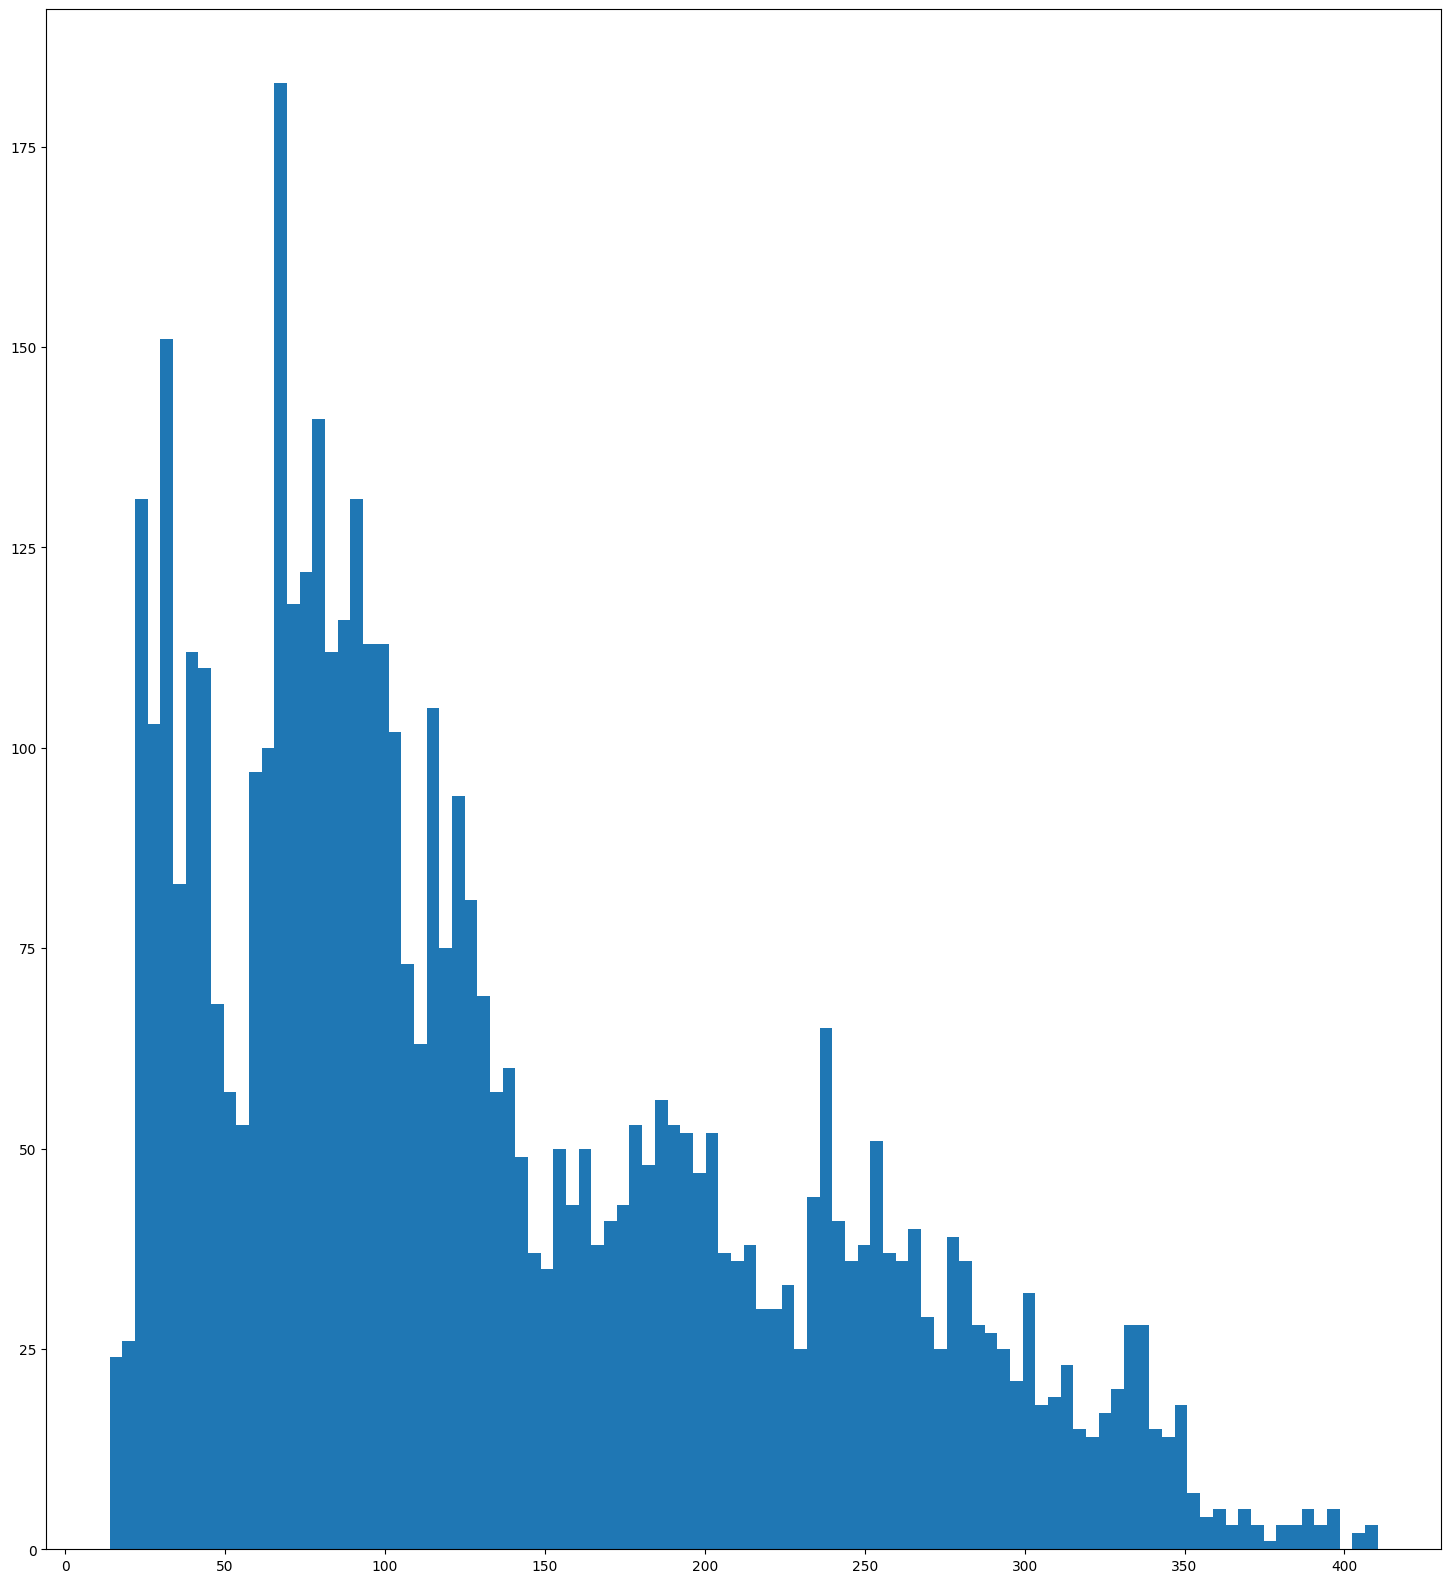

In [64]:
plt.figure()
plt.hist(clean["Value"], bins=100)
plt.show()

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'United Republic of Tanzania', 'United States of America', 'Uruguay',
       'Uzbekistan', 'Vanuatu', 'Venezuela (Bolivarian Republic of)',
       'Viet Nam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country Name', length=164)


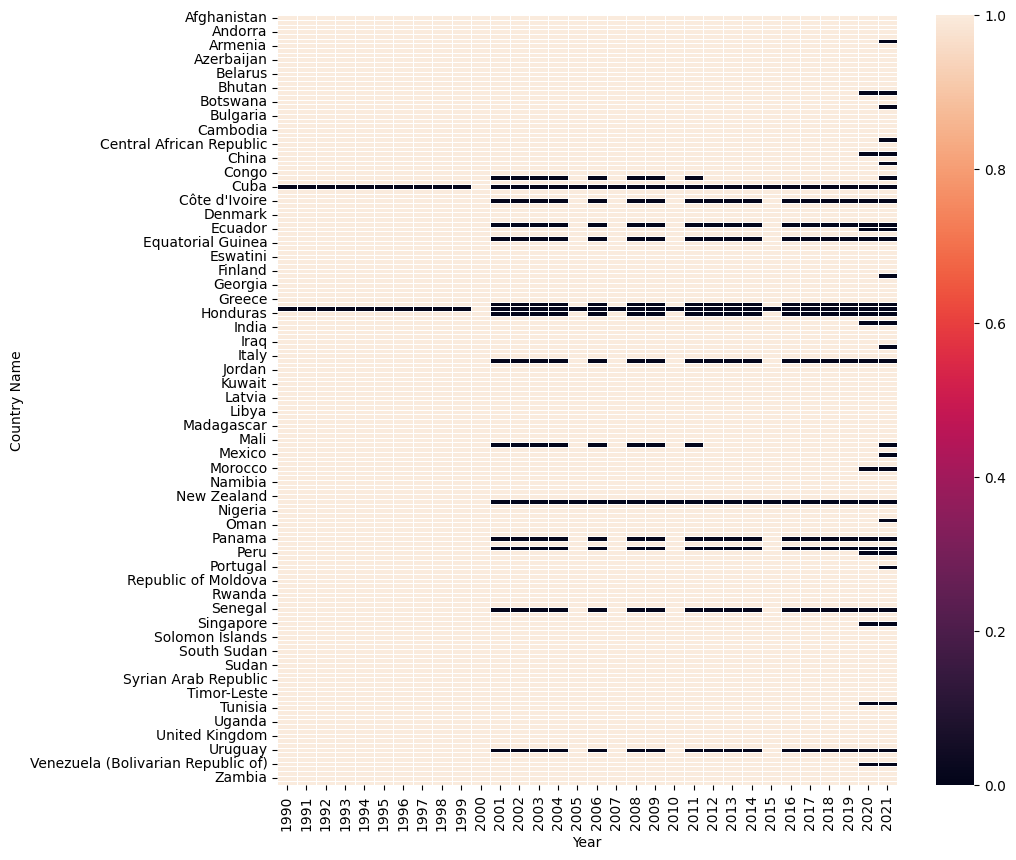

In [71]:
pivotClean = clean.pivot_table(index="Country Name", columns="Year", aggfunc="size", fill_value=0)
print(pivotClean.index)

plt.rcParams["figure.figsize"] = (10,10)

# pivotClean.plot(kind="barh", stacked=True)
sns.heatmap(pivotClean, linecolor="white", linewidths=0.5)

plt.xticks()
plt.show()

In [ ]:
high_mask = clean[(clean["Country Name"] == "South Africa") | (clean["Country Name"] == "India") | (clean["Country Name"] == "Indonesia")].index.values 
not_high_mask = np.setdiff1d(clean.index.values, high_mask)

clean = clean.select_dtypes(["float", "int"])

clean.columns

Index(['Year', 'Value', 'Life expectancy at birth, total (years)',
       'Mortality rate, infant (per 1,000 live births)', 'Population, total',
       'CO2 emissions', 'Coal consumption', 'Energy use', 'Electricity use',
       'Raw materials extracted', 'Oil consumption', 'u10', 'v10', 'd2m',
       't2m', 'sst', 'sp', 'skt', 'blh', 'PM2.5 pollution'],
      dtype='object')

/tmp/ipykernel_12548/3512355701.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


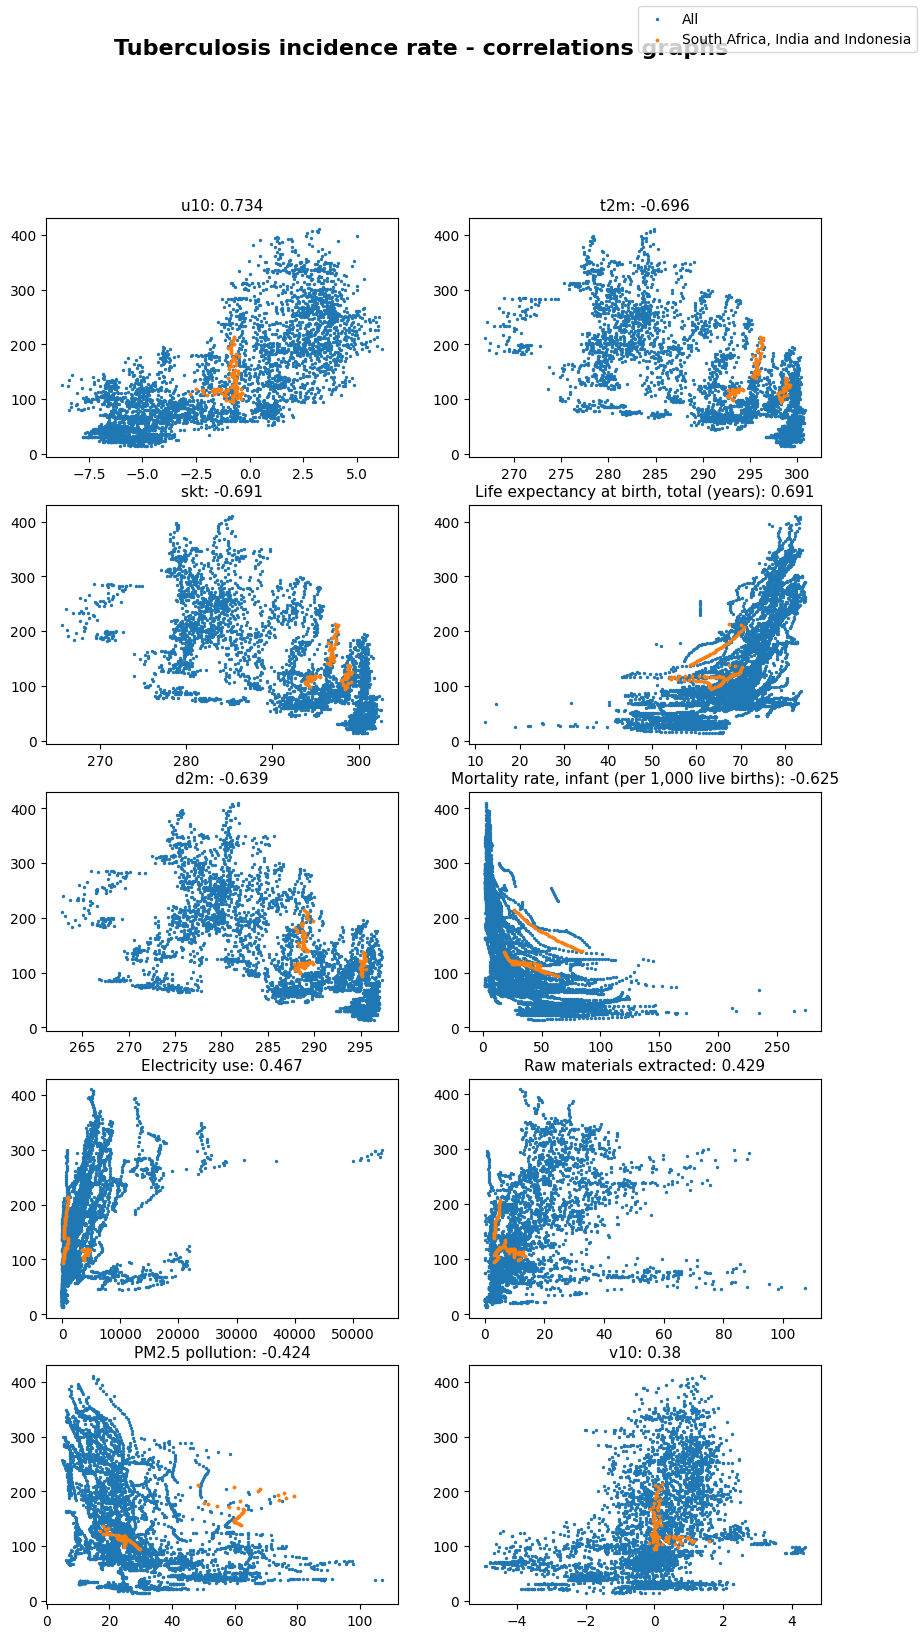

In [ ]:
correlations = clean.corrwith(clean['Value'])

correlations = correlations[2:]

correlations = correlations.sort_values(ascending=False, key=lambda x: abs(x))
# Correlations of more than 0.4 are considered notable.

fig, axes = plt.subplots(5, 2, figsize=(10, 18))
fig.suptitle('Tuberculosis incidence rate - correlations graphs', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
    ax.scatter(clean[correlations.index[i]], clean["Value"], s=2)
    ax.scatter(clean.loc[high_mask, correlations.index[i]], clean.loc[high_mask, "Value"], s=3)
    ax.set_title(f"{correlations.index[i]}: {round(correlations.iloc[i], 3)}", fontsize=11)

fig.legend(["All", "South Africa, India and Indonesia"])
fig.show()

/tmp/ipykernel_12548/2243138341.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


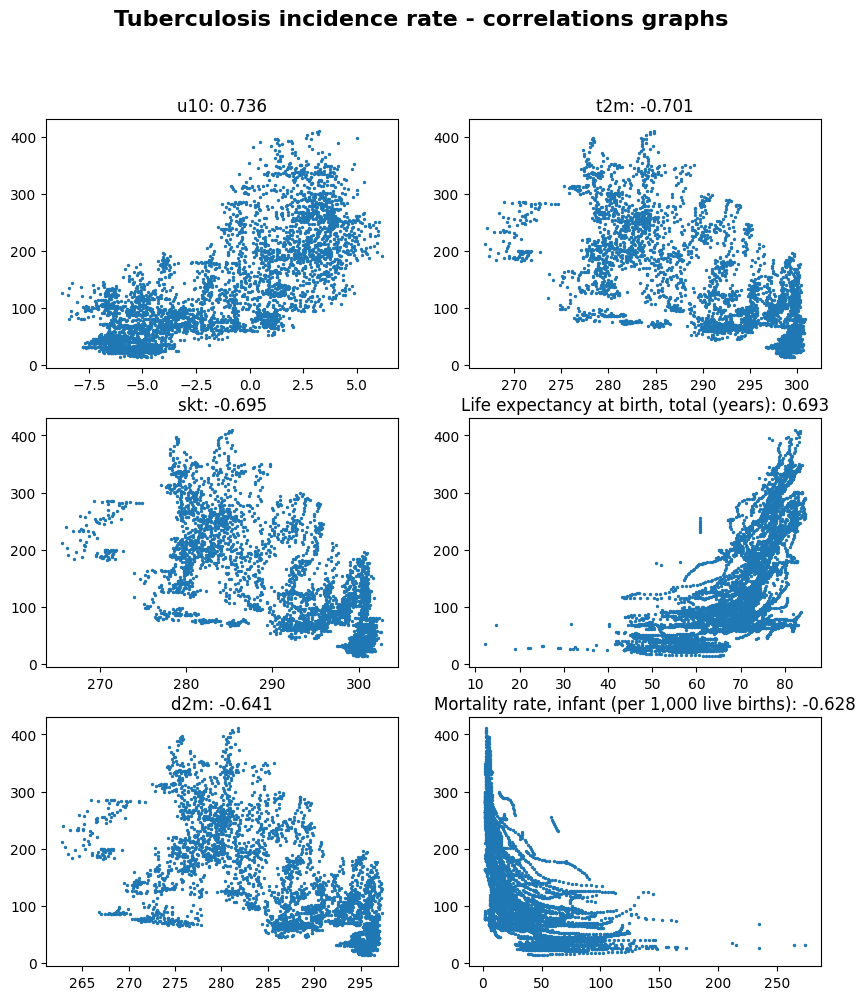

In [ ]:
not_high = clean.loc[not_high_mask]

correlations = not_high.corrwith(not_high['Value'])

correlations = correlations[2:]

correlations = correlations.sort_values(ascending=False, key=lambda x: abs(x))

# Correlations of more than 0.4 are considered notable.



fig, axes = plt.subplots(3, 2, figsize=(10, 11))
fig.suptitle('Tuberculosis incidence rate - correlations graphs', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
    ax.scatter(not_high[correlations.index[i]], not_high["Value"], s=2)
    ax.set_title(f"{correlations.index[i]}: {round(correlations.iloc[i], 3)}")

fig.show()
